In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io as sio 
from scipy import stats

In [2]:
# Read data
fname = 'indy_20160927_04'
monkey = fname[0:4]
# fullpath = os.path.join('..','dataset',monkey ,'The_nwb_Raw_Dataset', fname)
# data_nwb = h5py.File(fullpath+'.nwb', 'r')
fullpath = os.path.join('..','dataset',monkey ,'Sorted_Spike_Dataset', fname)
data_mat = h5py.File(fullpath+'.mat', 'r')
# print(data_nwb)
print(data_mat)

<HDF5 file "indy_20160927_04.mat" (mode r)>


In [3]:
spikes = []
ch_name = []
for i in range(96):
    tmp = []
    for j in range(5):
        try:
            LEN = len(data_mat[data_mat['spikes'][j][i]][0])
            print(i+1, j, LEN, end=' & ')
            ch_name.append((i+1, len(tmp)))
            tmp.append(list(data_mat[data_mat['spikes'][j][i]][0]))
            
        except:
            pass
    spikes.append(tmp)

1 0 4362 & 1 1 27 & 1 2 2368 & 1 3 8 & 2 0 2709 & 2 1 2193 & 2 2 519 & 2 3 2916 & 2 4 1956 & 3 0 1090 & 3 1 2472 & 4 0 4329 & 4 1 194 & 4 2 636 & 4 3 9157 & 5 0 1410 & 5 1 8282 & 5 2 11 & 6 0 1198 & 6 1 845 & 7 0 4796 & 7 1 3571 & 8 0 1686 & 8 1 1100 & 8 2 3489 & 9 0 157 & 9 1 1343 & 9 2 830 & 9 3 215 & 10 0 685 & 10 1 636 & 10 2 1520 & 11 0 155 & 11 1 1325 & 11 2 80 & 11 3 26 & 11 4 12 & 12 0 472 & 12 2 2300 & 13 0 2250 & 13 1 9 & 13 2 35 & 13 3 1539 & 14 0 843 & 14 1 4 & 14 2 1870 & 15 0 41 & 15 1 220 & 15 2 54 & 16 0 1073 & 16 1 2904 & 17 0 3117 & 17 1 1711 & 17 2 420 & 18 0 1535 & 18 1 318 & 18 2 1133 & 19 0 586 & 19 3 6420 & 20 0 103 & 20 1 16 & 20 2 68 & 21 0 73 & 21 2 4112 & 21 4 3323 & 22 0 1002 & 22 1 296 & 22 2 2545 & 22 3 6 & 23 0 574 & 23 1 186 & 23 2 3213 & 24 0 4098 & 24 1 3733 & 24 3 813 & 25 0 4430 & 25 1 5731 & 25 2 139 & 26 0 2079 & 26 1 78 & 26 2 2563 & 27 0 4450 & 27 1 3039 & 27 2 5470 & 27 3 296 & 28 0 1184 & 28 1 379 & 30 0 793 & 30 1 1614 & 31 0 2367 & 31 1 1740 

In [4]:
def spike_del_pvalue(A, B):
    if A == B:
        return 1
    trainA = spikes[A[0]-1][A[1]]
    trainB = spikes[B[0]-1][B[1]]
    if len(trainA) < 100 or len(trainB) < 100:
        return 1
    train = []
    for it in trainA:
        train.append((it, 'A'))
    for it in trainB:
        train.append((it, 'B'))
    train = sorted(train)


    Q = list()
    T = 0.05
    delta = []
    for it in train:
        while len(Q) > 0 and Q[0][0] + T < it[0]:
            Q.pop(0)
        for itt in Q[::-1]:
            if itt[1] == it[1]:
                continue
            delt = it[0] - itt[0]
            if it[1] == 'A':
                delt = -delt
            delta.append(delt)
            break
        Q = []
        Q.append(it)

    if len(delta) < 100:
        return 1
    shapiro_test = stats.shapiro(delta[0:min(300, len(delta))])
    return shapiro_test.pvalue

    
    
def spike_del_plot(A, B):
    if A == B:
        return
    trainA = spikes[A[0]-1][A[1]]
    trainB = spikes[B[0]-1][B[1]]
    if len(trainA) < 100 or len(trainB) < 100:
        return
    train = []
    for it in trainA:
        train.append((it, 'A'))
    for it in trainB:
        train.append((it, 'B'))
    train = sorted(train)
#     print(len(train))

    Q = list()
    T = 0.05
    delta = []
    for it in train:
        while len(Q) > 0 and Q[0][0] + T < it[0]:
            Q.pop(0)
    #     print(len(Q), end = ' ')
        for itt in Q[::-1]:
            if itt[1] == it[1]:
                continue
            delt = it[0] - itt[0]
            if it[1] == 'A':
                delt = -delt
            delta.append(delt)
            break
        Q = []
        Q.append(it)
#     print(len(delta))
    if len(delta) < 100:
        return
    shapiro_test = stats.shapiro(delta[0:min(300, len(delta))])
    if shapiro_test.pvalue > 0.05:
        return
    plt.figure(figsize = (20, 4))
    plt.plot(delta, '.')
    plt.title(str(A)+' '+str(B)+' pvalue: '+str(shapiro_test.pvalue))
    # plt.ylim(-0.0025,0.0025)
    plt.xlim(0, min(3000, len(delta)))
    plt.show()

In [5]:
A = (19, 3)
# B = (25-1, 4)
two_pair_pvalue = []
for A in ch_name:
    print(A, end = ' ')
    for B in ch_name:
        if B < A:
            continue
        p = spike_del_pvalue(A, B)
        two_pair_pvalue.append((p, A, B))

(1, 0) (1, 1) (1, 2) (1, 3) (2, 0) (2, 1) (2, 2) (2, 3) (2, 4) (3, 0) (3, 1) (4, 0) (4, 1) (4, 2) (4, 3) (5, 0) (5, 1) (5, 2) (6, 0) (6, 1) (7, 0) (7, 1) (8, 0) (8, 1) (8, 2) (9, 0) (9, 1) (9, 2) (9, 3) (10, 0) (10, 1) (10, 2) (11, 0) (11, 1) (11, 2) (11, 3) (11, 4) (12, 0) (12, 1) (13, 0) (13, 1) (13, 2) (13, 3) (14, 0) (14, 1) (14, 2) (15, 0) (15, 1) (15, 2) (16, 0) (16, 1) (17, 0) (17, 1) (17, 2) (18, 0) (18, 1) (18, 2) (19, 0) (19, 1) (20, 0) (20, 1) (20, 2) (21, 0) (21, 1) (21, 2) (22, 0) (22, 1) (22, 2) (22, 3) (23, 0) (23, 1) (23, 2) (24, 0) (24, 1) (24, 2) (25, 0) (25, 1) (25, 2) (26, 0) (26, 1) (26, 2) (27, 0) (27, 1) (27, 2) (27, 3) (28, 0) (28, 1) (30, 0) (30, 1) (31, 0) (31, 1) (32, 0) (32, 1) (32, 2) (32, 3) (33, 0) (33, 1) (33, 2) (33, 3) (34, 0) (36, 0) (36, 1) (36, 2) (37, 0) (37, 1) (37, 2) (37, 3) (38, 0) (38, 1) (39, 0) (39, 1) (39, 2) (40, 0) (41, 0) (41, 1) (41, 2) (42, 0) (42, 1) (43, 0) (43, 1) (43, 2) (44, 0) (44, 1) (44, 2) (44, 3) (46, 0) (46, 1) (48, 0) (48, 

35511
[(1.24351600041036e-17, (2, 2), (88, 0)), (4.511598570819373e-17, (38, 0), (40, 0)), (6.4720331661823e-16, (2, 1), (88, 0)), (5.459208660216902e-15, (25, 2), (46, 0)), (1.2771336620903424e-14, (80, 1), (86, 1)), (1.5416360476063797e-14, (27, 3), (48, 0)), (1.5629939833713968e-14, (80, 2), (86, 2)), (2.3131189075698694e-14, (38, 1), (40, 0)), (3.857676710624508e-14, (4, 1), (7, 0)), (6.975719508322056e-14, (53, 1), (55, 1))]


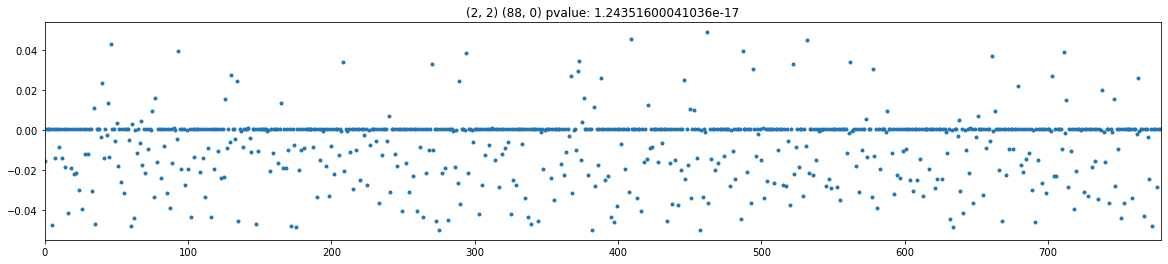

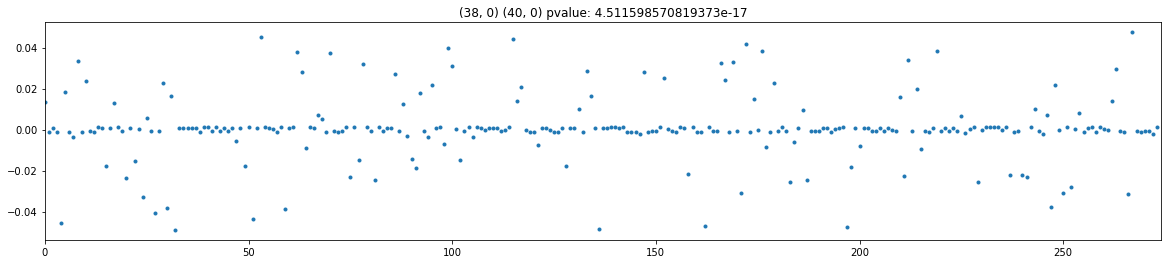

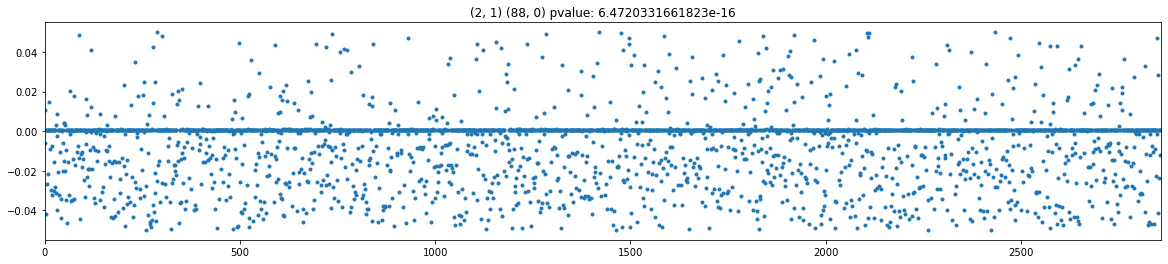

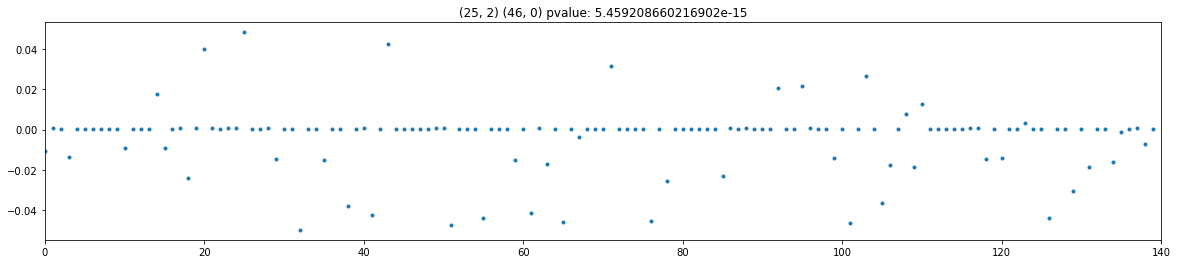

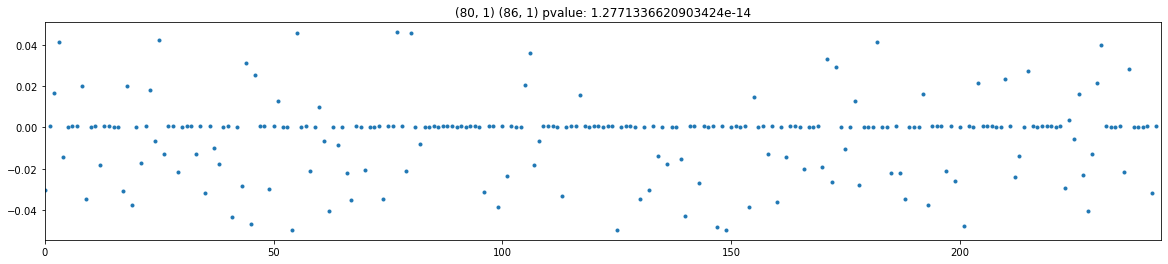

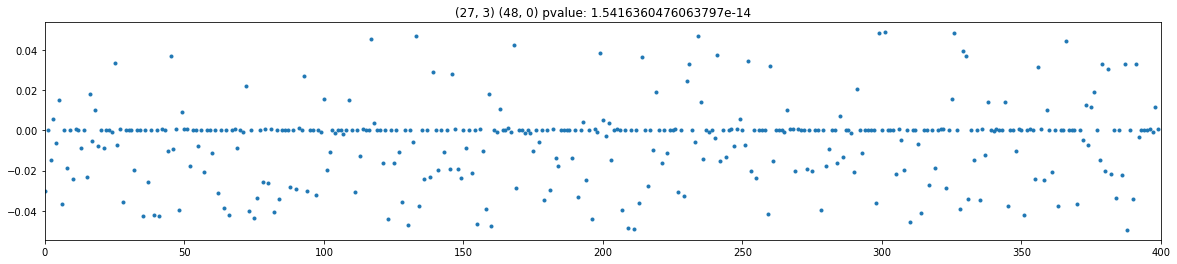

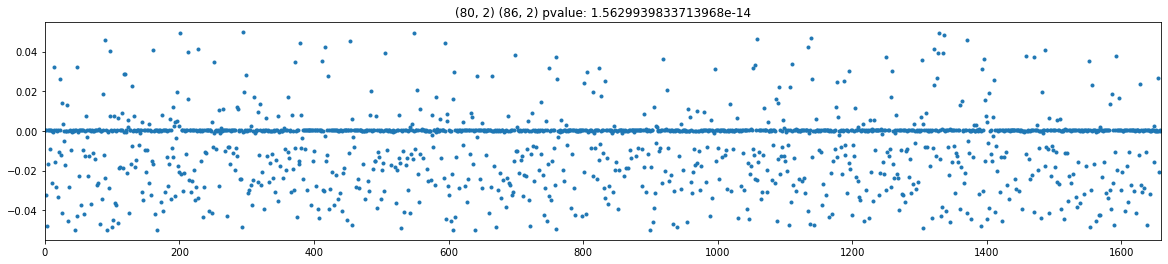

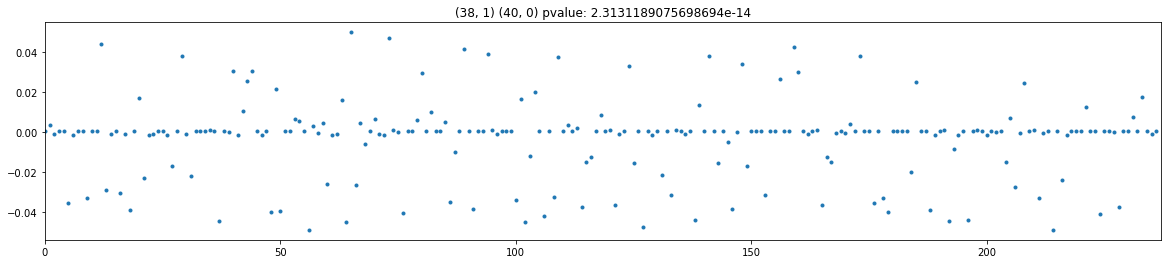

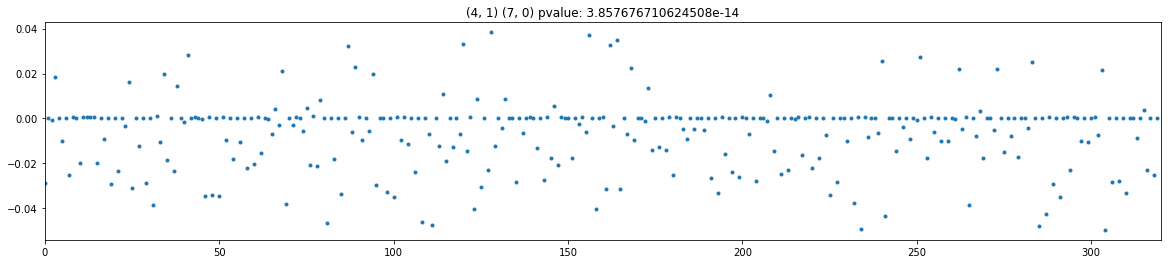

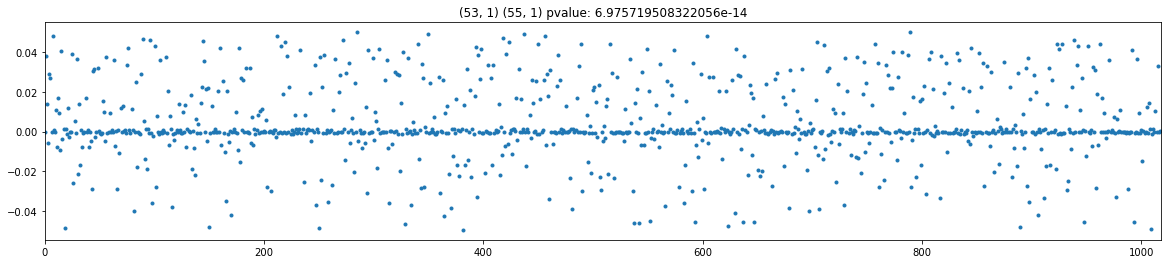

In [8]:
two_pair_pvalue = sorted(two_pair_pvalue)
print(len(two_pair_pvalue))
print(two_pair_pvalue[0:10])
for it in two_pair_pvalue[0:10]:
    spike_del_plot(it[1], it[2])

In [7]:
np.save('log/' + fname+'two_pair_pvalue', two_pair_pvalue)